# Introduction to Data Visualization

1. Matplotlib
    1. Plotting a quantity: bar plot
    2. Plotting a continuous function: line plot
    3. Plotting relationships: scatter plots
    4. Plotting distributions:
        - Histogram
        - Boxplot
    5. Customizing & combining plots
        - Two series with legend
        - Multiple plot types, same axes
        - Multiple subplots

2. Seaborn
    1. Line plot
    2. Scatter plot
    3. Distribution plots
        - Histogram
        - KDE
        - Pair plot
        - Boxplot

## 1. Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1.1. Bar plot

Matplotlib [bar plot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

In [2]:
# Generate data for a bar chart
categories = ['Category A', 'Category B', 'Category C']
values = [25, 40, 15]

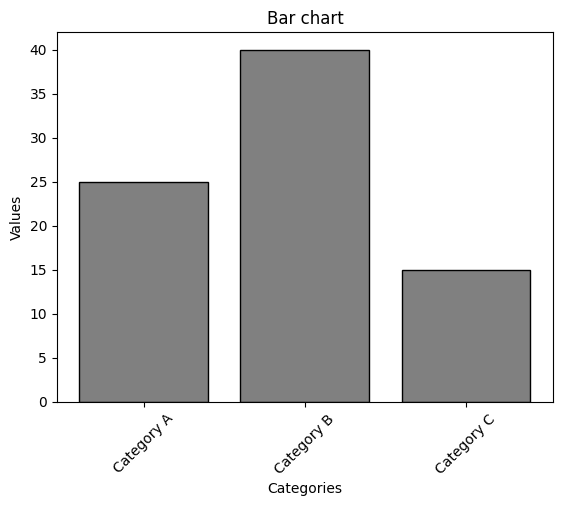

In [3]:
plt.title('Bar chart')
plt.bar(categories, values, color='grey', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

### 1.2. Line plot

Matplotlib [plot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [4]:
# Generate data for a line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

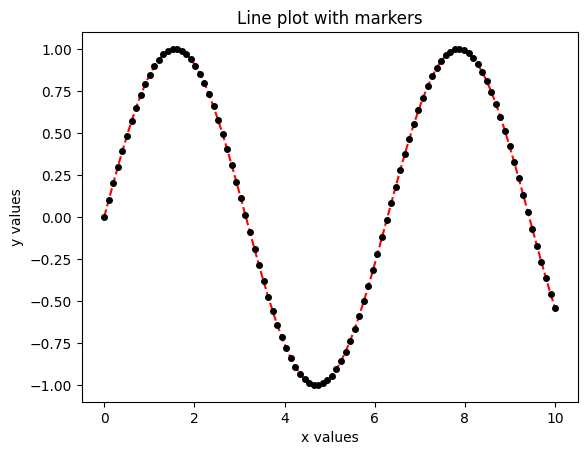

In [5]:
plt.title('Line plot with markers')

plt.plot(
    x,
    y,
    color='red',
    linestyle='--',
    marker='o',
    markerfacecolor='black',
    markeredgecolor='black',
    markersize=4
)

plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

### 1.3. Scatter plot

Matplotlib [scatter plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [6]:
x = np.random.rand(100)
y = 2 * x + np.random.randn(100)

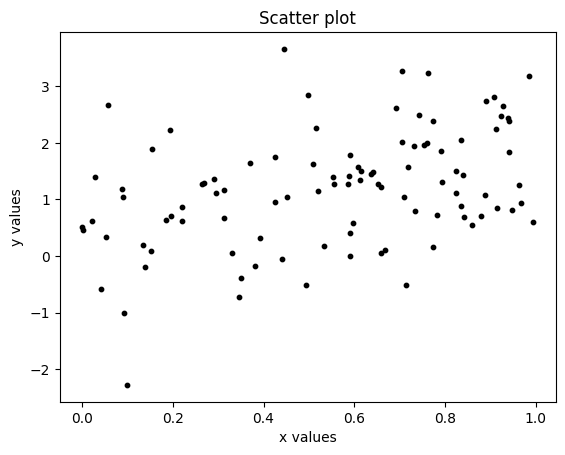

In [7]:
plt.title('Scatter plot')
plt.scatter(x, y, color='black', s=10)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### 1.4. Distribution plots

#### 1.4.1. Histogram

Matplotlib [histogram documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

In [8]:
data = np.random.normal(0, 1, 10000)

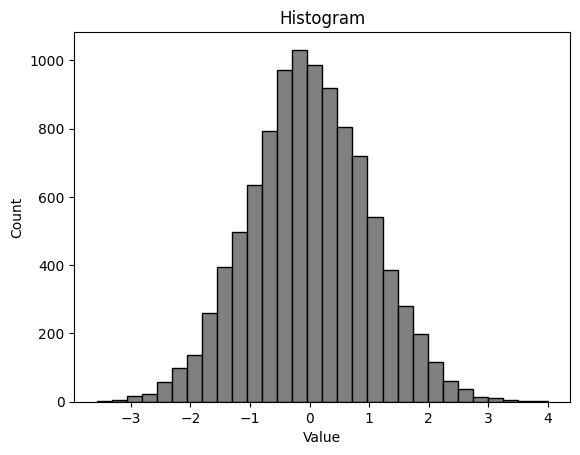

In [9]:
plt.title('Histogram')
plt.hist(data, bins=30, color='gray', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

#### 1.4.2. Boxplot

Matplotlib [boxplot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

In [10]:
# Generate data for a box plot
data = [
    np.random.normal(0, 1, 100),
    np.random.normal(0, 1.5, 100), 
    np.random.normal(0, 2, 100)
]

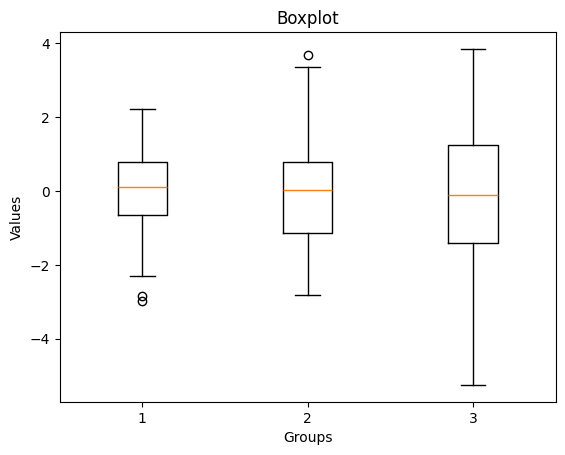

In [11]:
plt.title('Boxplot')
plt.boxplot(data)
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

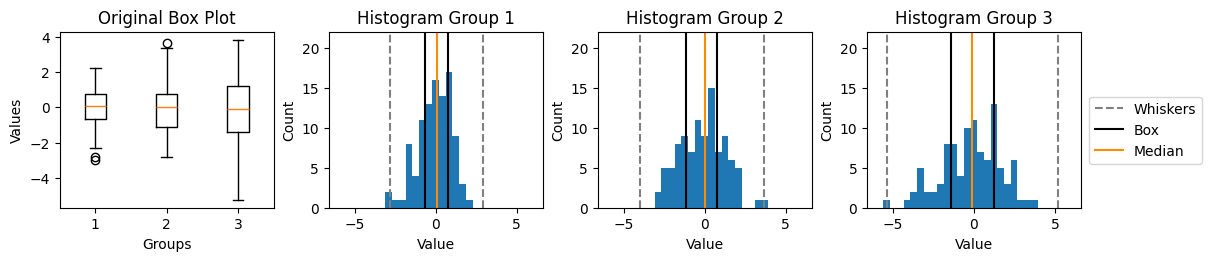

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2.5), layout='constrained')
axs = axs.flatten()

# Original box plot
axs[0].set_title('Original Box Plot')
axs[0].boxplot(data)
axs[0].set_xlabel('Groups')
axs[0].set_ylabel('Values')

#########################################################
# Individual group histograms

# Calculate one set of bins for all three groups
bins = np.linspace(-6, 6, 30)

# Get the max count for group 1 to set a common y axis limit
counts, _  = np.histogram(data[0], bins=bins)
y_max = max(counts)

# Loop to plot each distribution
for i, distribution in enumerate(data):

    # Calculate quartiles and whiskers to add to histogram as vertical lines
    quartiles = np.percentile(distribution, [25, 50, 75])

    first_quartile = quartiles[0]
    median = quartiles[1]
    third_quartile = quartiles[2]

    iqr = third_quartile - first_quartile
    lower_whisker = first_quartile - 1.5 * iqr
    upper_whisker = third_quartile + 1.5 * iqr

    # Plot and annotate the histogram
    axs[i+1].set_title(f'Histogram Group {i+1}')
    axs[i+1].hist(distribution, bins=bins)
    axs[i+1].axvline(lower_whisker, color='grey', label='Whiskers', linestyle='--')
    axs[i+1].axvline(first_quartile, color='black', label='Box')
    axs[i+1].axvline(median, color='darkorange', label='Median')
    axs[i+1].axvline(third_quartile, color='black')
    axs[i+1].axvline(upper_whisker, color='grey', linestyle='--')
    axs[i+1].set_ylim(0, y_max + 5)
    axs[i+1].set_xlabel('Value')
    axs[i+1].set_ylabel('Count')

# Add a single legend for all 3 histogram subplots
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside right center')

plt.show()

### 1.5. Customizing and combining plots

In [13]:
import pandas as pd

In [14]:
n = 1000
x = np.random.uniform(0, 10, n)

y1_linear = 0.5 * x + 10
y2_linear = 2.5 * x + 0.1

y1_noise = y1_linear + np.random.normal(0, 1, n)
y2_noise = y2_linear + np.random.normal(0, 1, n)

df = pd.DataFrame({
    'x': x,
    'y1_linear': y1_linear,
    'y2_linear': y2_linear,
    'y1_noise': y1_noise,
    'y2_noise': y2_noise
})

df.head()

,x,y1_linear,y2_linear,y1_noise,y2_noise
0,5.804962,12.902481,14.612406,13.501180,14.866841
1,4.655488,12.327744,11.738721,10.595264,11.173093
2,0.976734,10.488367,2.541834,10.120752,3.066079
3,7.806779,13.903390,19.616948,15.235122,19.700741
4,5.726020,12.863010,14.415049,11.798900,14.118722


#### 1.5.1. Two series with legend

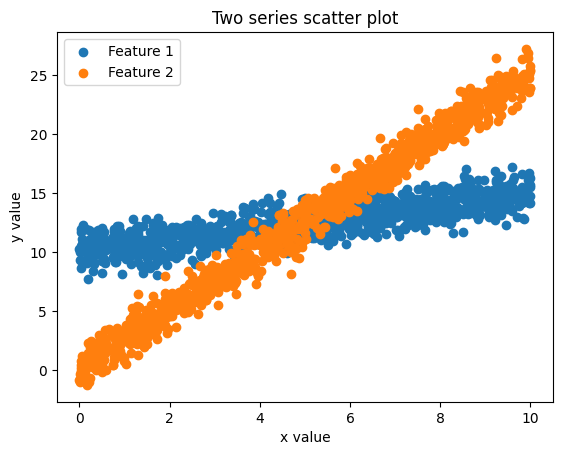

In [15]:
plt.title('Two series scatter plot')
plt.scatter(df['x'], df['y1_noise'], label='Feature 1')
plt.scatter(df['x'], df['y2_noise'], label='Feature 2')
plt.xlabel('x value')
plt.ylabel('y value')
plt.legend()
plt.show()

#### 1.5.2. Multiple plot types, same axes

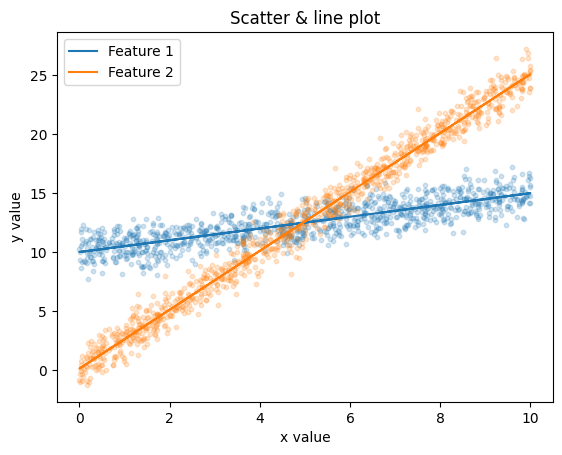

In [16]:
plt.title('Scatter & line plot')
plt.scatter(df['x'], df['y1_noise'], s=10, alpha=0.2)
plt.scatter(df['x'], df['y2_noise'], s=10, alpha=0.2)

plt.plot(df['x'], df['y1_linear'], label='Feature 1')
plt.plot(df['x'], df['y2_linear'], label='Feature 2')

plt.xlabel('x value')
plt.ylabel('y value')

plt.legend()
plt.show()

#### 1.5.3. Multiple subplots

In [17]:
import matplotlib as mpl

# Set a non-standard default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['darkviolet', 'seagreen'])

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

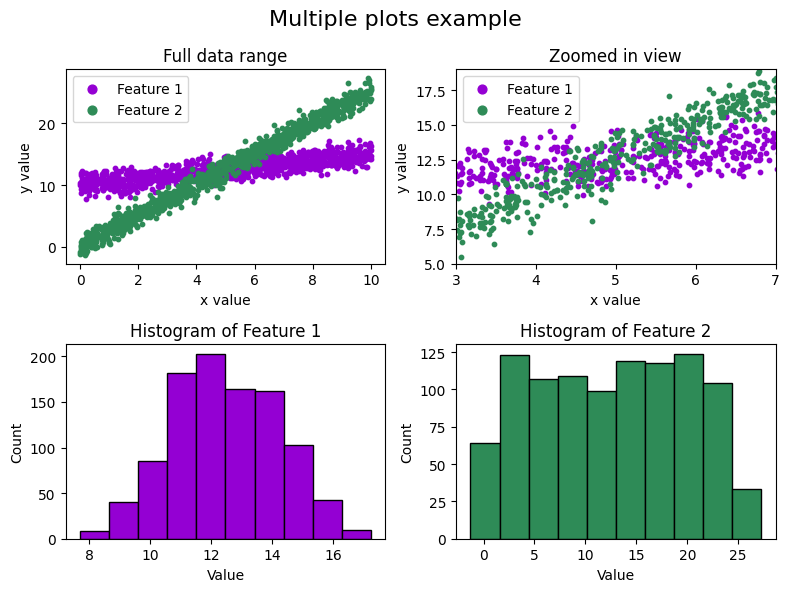

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

fig.suptitle('Multiple plots example', fontsize=16)

axs[0].set_title('Full data range')
axs[0].scatter(df['x'], df['y1_noise'], s=10, label='Feature 1')
axs[0].scatter(df['x'], df['y2_noise'], s=10, label='Feature 2')
axs[0].set_xlabel('x value')
axs[0].set_ylabel('y value')
axs[0].legend(loc='upper left', markerscale=2)

axs[1].set_title('Zoomed in view')
axs[1].scatter(df['x'], df['y1_noise'], s=10, label='Feature 1')
axs[1].scatter(df['x'], df['y2_noise'], s=10, label='Feature 2')
axs[1].set_xlim(3, 7)
axs[1].set_ylim(5, 19)
axs[1].set_xlabel('x value')
axs[1].set_ylabel('y value')
axs[1].legend(loc='upper left', markerscale=2)

axs[2].set_title('Histogram of Feature 1')
axs[2].hist(df['y1_noise'], color=colors[0], edgecolor='black')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Count')

axs[3].set_title('Histogram of Feature 2')
axs[3].hist(df['y2_noise'], color=colors[1], edgecolor='black')
axs[3].set_xlabel('Value')
axs[3].set_ylabel('Count')

plt.tight_layout()
plt.savefig('multiple_plots.png')
plt.show()

## 2. Seaborn

In [19]:
import seaborn as sns

# Unset color cycle from prior example
sns.reset_defaults()

In [20]:
# Load the built in tips dataset
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2.1. Line plot

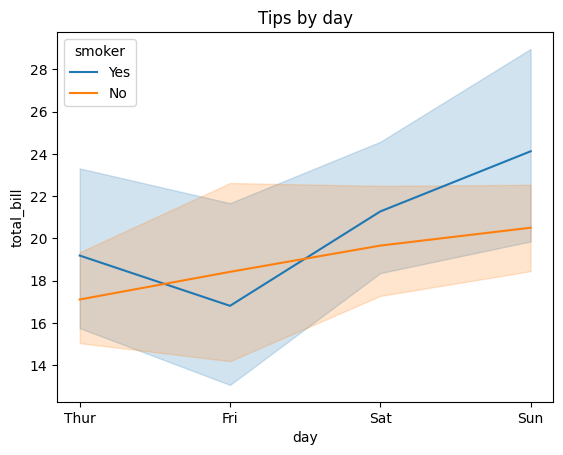

In [21]:
plt.title('Tips by day')
sns.lineplot(x='day', y='total_bill', data=tips_df, hue='smoker')
plt.show()

### 2.2. Scatter plot

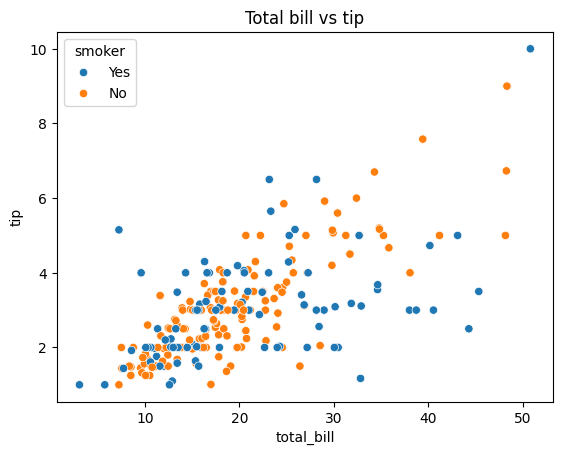

In [22]:
plt.title('Total bill vs tip')
sns.scatterplot(x='total_bill', y='tip', data=tips_df, hue='smoker')
plt.show()

### 2.3. Distribution plots

#### 2.3.1. Histogram

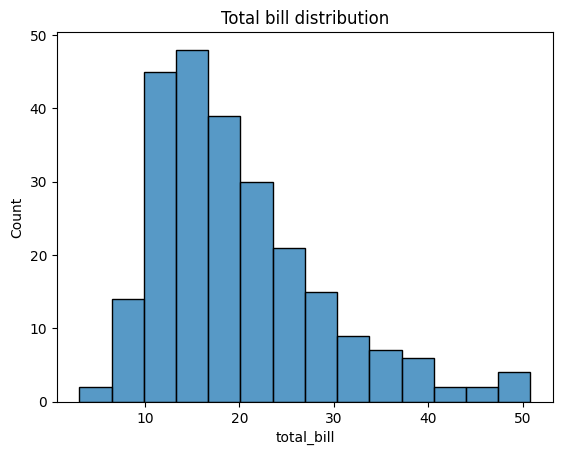

In [23]:
plt.title('Total bill distribution')
sns.histplot(tips_df['total_bill'])
plt.show()

#### 2.3.2. KDE (kernel density estimate)

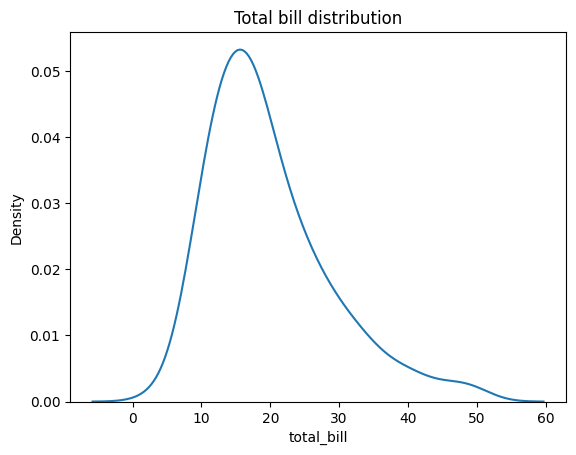

In [24]:
plt.title('Total bill distribution')
sns.kdeplot(tips_df['total_bill'])
plt.show()

#### 2.3.3. Pair plot

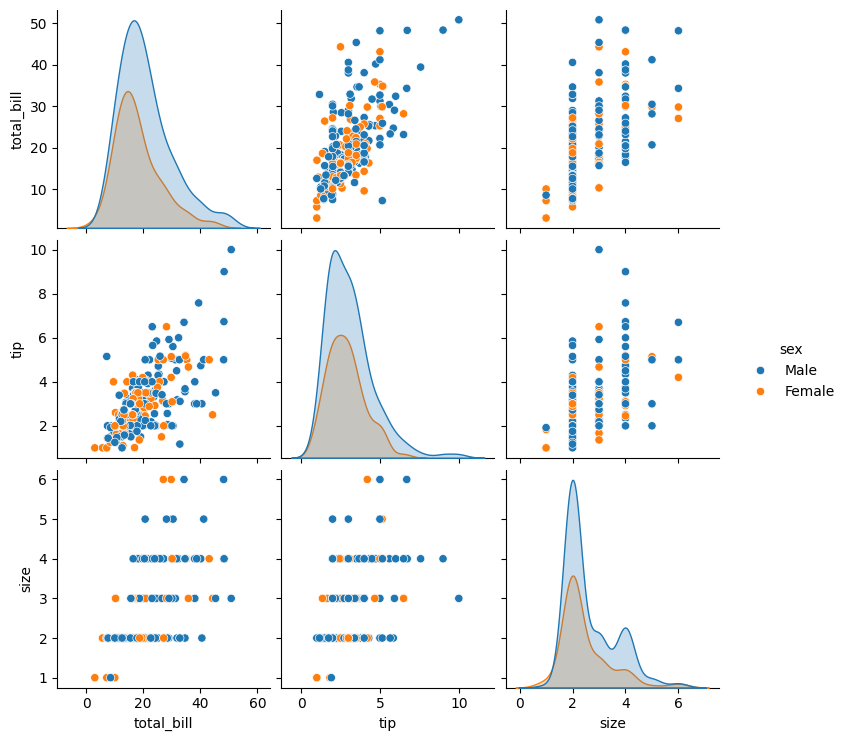

In [25]:
sns.pairplot(tips_df, hue='sex')
plt.show()

#### 2.3.4. Boxplot

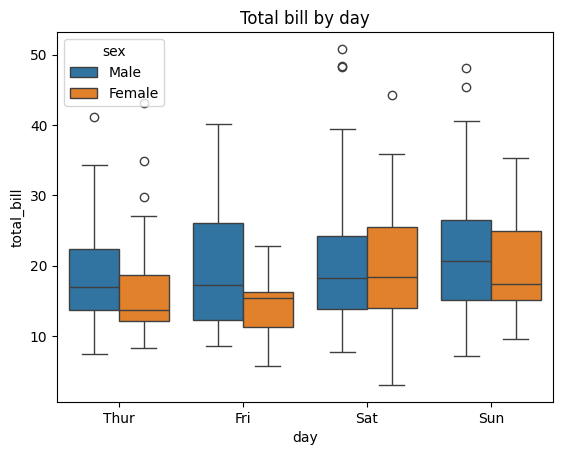

In [26]:
plt.title('Total bill by day')
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.show()